In [2]:
import polars as pl

In [8]:
df = pl.read_parquet("/Users/guillemlopezcolomer/Desktop/traffic_prediction_tfg/data/dataset_1y.parquet")
df_imputed = pl.read_parquet("/Users/guillemlopezcolomer/Desktop/traffic_prediction_tfg/data/processed/dataset_imputed.parquet")
df_imputed_clean = pl.read_parquet("/Users/guillemlopezcolomer/Desktop/traffic_prediction_tfg/data/processed/dataset_imputed_clean.parquet")

In [4]:
df.head(10)

idTram,data,estatActual,estatPrevist,timestamp
i64,str,i64,i64,datetime[μs]
1,"""20231201000058""",1,0,2023-12-01 00:00:58
1,"""20231201001555""",1,1,2023-12-01 00:15:55
1,"""20231201002056""",0,0,2023-12-01 00:20:56
1,"""20231201003057""",1,1,2023-12-01 00:30:57
1,"""20231201004054""",0,0,2023-12-01 00:40:54
1,"""20231201005053""",1,1,2023-12-01 00:50:53
1,"""20231201005555""",1,1,2023-12-01 00:55:55
1,"""20231201010100""",1,1,2023-12-01 01:01:00
1,"""20231201011054""",0,0,2023-12-01 01:10:54


In [9]:
df_imputed_clean.head(10)

idTram,timestamp,estatActual,is_gap,gap_type,estatActual_imputed
i32,datetime[μs],i8,bool,str,bool
1,2023-12-01 00:00:00,1,false,null,true
1,2023-12-01 00:05:00,1,true,"""short""",true
1,2023-12-01 00:10:00,1,true,"""short""",true
1,2023-12-01 00:15:00,1,false,null,true
1,2023-12-01 00:20:00,1,true,"""short""",true
1,2023-12-01 00:25:00,1,true,"""short""",true
1,2023-12-01 00:30:00,1,false,null,true
1,2023-12-01 00:35:00,1,true,"""short""",true
1,2023-12-01 00:40:00,1,true,"""short""",true


In [13]:
df_imputed_clean.filter(pl.col('estatActual').is_null())

idTram,timestamp,estatActual,is_gap,gap_type,estatActual_imputed
i32,datetime[μs],i8,bool,str,bool


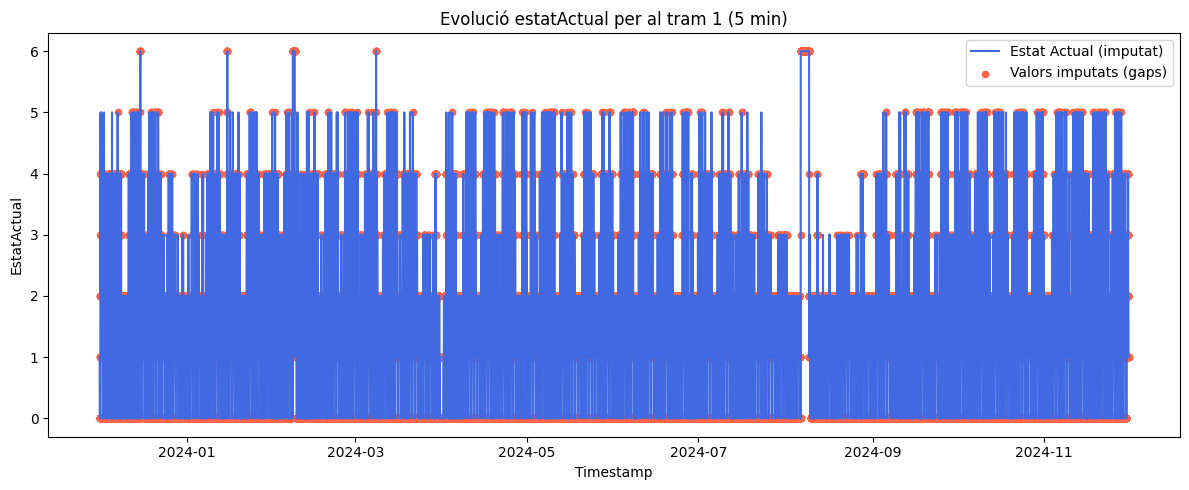

In [17]:
import matplotlib.pyplot as plt

# converteix a pandas
pdf = df_imputed.filter(pl.col("idTram") == 1).to_pandas()

plt.figure(figsize=(12,5))
plt.plot(pdf["timestamp"], pdf["estatActual"], label="Estat Actual (imputat)", color="royalblue", lw=1.5)

# ressalta punts imputats (on is_gap=True)
mask_imputed = pdf["is_gap"]
plt.scatter(pdf.loc[mask_imputed, "timestamp"], pdf.loc[mask_imputed, "estatActual"],
            color="tomato", s=20, label="Valors imputats (gaps)")

plt.title("Evolució estatActual per al tram 1 (5 min)")
plt.xlabel("Timestamp")
plt.ylabel("EstatActual")
plt.legend()
plt.tight_layout()
plt.show()

